# Phase Portrait Applications: Pendulums

Teng-Jui Lin

Content adapted from UW AMATH 301, Beginning Scientific Computing, in Spring 2020.

- Phase portraits
    - Linear pendulum
    - Nonlinear pendulum

## Linear pendulum

The motion of a linear pendulum at small angles can be described by the linear second-order ODE

$$
\ddot{\theta} = -\dfrac{g}{L}\theta
$$

where $\theta$ is the angle of deflection of the pendulum from the vertical. Given physical parameters $L = 1 \ \mathrm{m}$ and $g = 9.8 \ \mathrm{m/s^2}$. The second-order ODE can be converted to a system of two first-order ODEs

$$
\begin{cases}
\dot{\theta} = \omega \\
\dot{\omega} = -\dfrac{g}{L}\theta
\end{cases}
$$

**Problem Statement.** Solve the system of ODEs using `scipy.integrate.solve_ivp()` in $t \in [0, 10] \ \mathrm{s}$ with $\Delta t = 0.005 \ \mathrm{s}$ given the initial condition $\theta(0) = 0, \omega(0) = 0.5$. Plot the phase portrait of the solution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate

In [2]:
# define physical constants
g = 9.8
l = 1

In [3]:
# define time array
t_initial = 0
t_final = 10
dt = 0.005
t = np.arange(t_initial, t_final+dt/2, dt)
t_len = len(t)

In [4]:
# define initial conditions
initial_val = np.array([0, 0.5])

In [5]:
# define ode system
dtheta_dt = lambda theta, omega : omega
domega_dt = lambda theta, omega: -g/l*theta
ode_syst = lambda t, z : np.array([dtheta_dt(*z), domega_dt(*z)])

In [6]:
# solve ode system
ode_soln = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_val, t_eval=t).y

In [7]:
# plot settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    'savefig.dpi': 300,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14
})

In [8]:
# quiver grid
theta_vec = np.linspace(-0.7, 0.7, 20)
omega_vec = np.linspace(-0.7, 0.7, 20)
Theta, Omega = np.meshgrid(theta_vec, omega_vec)

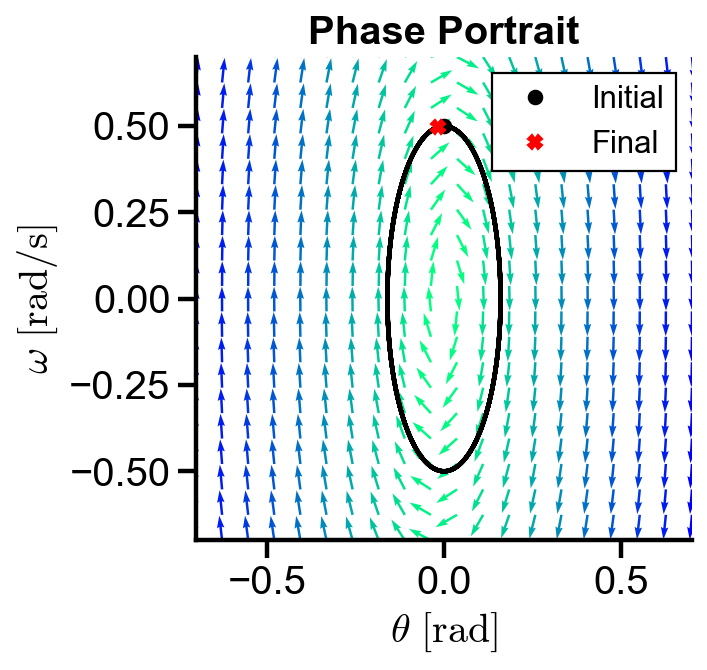

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))

# phase portrait
scale = np.sqrt(dtheta_dt(Theta, Omega)**2 + domega_dt(Theta, Omega)**2)
ax.quiver(Theta, Omega, dtheta_dt(Theta, Omega)/scale, domega_dt(Theta, Omega)/scale, scale, cmap='winter_r', scale=20, width=0.005)  # regular
ax.plot(*initial_val, 'o', color='black', label='Initial')
ax.plot(*ode_soln, color='black')
ax.plot(*ode_soln[:, -1], 'X', color='red', label='Final')
# plot settings
ax.set_xlabel('$\\theta \ [\mathrm{rad}]$')
ax.set_ylabel('$\omega \ [\mathrm{rad/s}]$')
ax.set_title('Phase Portrait')
ax.set_xlim(-0.7, 0.7)
ax.set_ylim(-0.7, 0.7)
ax.legend(loc='upper right')

▲ The figure above shows the phase portrait of a linear pendulum at small angles. The trajectory forms a close loop, indicating continued oscillatory behavior over time. Note that this only holds true for small angles due to small angle approximation.

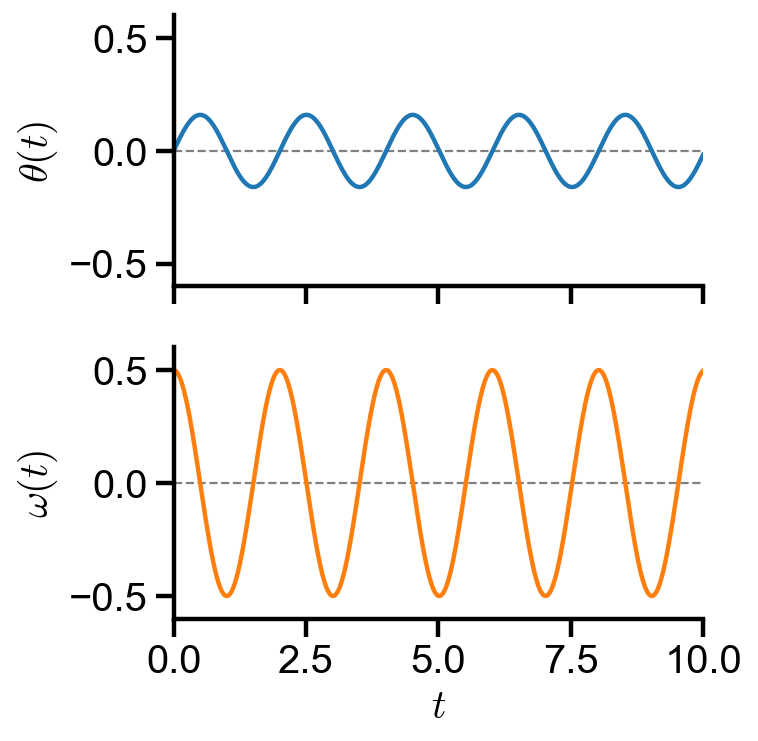

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(5, 5), sharex=True)
axs[0].plot(t, ode_soln[0], color='tab:blue', label='$\\theta(t)$')
axs[1].plot(t, ode_soln[1], color='tab:orange', label='$\omega(t)$')
axs[1].set_xlabel('$t$')
axs[0].set_ylabel('$\\theta(t)$')
axs[1].set_ylabel('$\omega(t)$')

for i in range(2):
    axs[i].plot([0, 30], [0, 0], '--', color='grey', lw=1, zorder=0)
    # # plot settings
    axs[i].set_xlim(t[0], t[-1])
    axs[i].set_ylim(-0.6, 0.6)

plt.tight_layout()

▲ The figure above shows the angle and angular velocity of a linear pendulum at small angles. Both of them oscillates sinusoidally without damping.

## Nonlinear pendulum

The motion of a pendulum without small angle approximation can be described by the nonlinear second-order ODE

$$
\ddot{\theta} = -\dfrac{g}{L}\sin(\theta)
$$

where $\theta$ is the angle of deflection of the pendulum from the vertical. Given physical parameters $L = 1 \ \mathrm{m}$ and $g = 9.8 \ \mathrm{m/s^2}$. The second-order ODE can be converted to a system of two first-order ODEs

$$
\begin{cases}
\dot{\theta} = \omega \\
\dot{\omega} = -\dfrac{g}{L}\sin(\theta)
\end{cases}
$$

**Problem Statement.** Solve the system of ODEs using `scipy.integrate.solve_ivp()` in $t \in [0, 10] \ \mathrm{s}$ with $\Delta t = 0.005 \ \mathrm{s}$ given the initial conditions

- $\theta(0) = 0, \omega(0) = 0.5$
- $\theta(0) = 2, \omega(0) = 1$
- $\theta(0) = \pi, \omega(0) = -10^{-4}$
- $\theta(0) = 2\pi, \omega(0) = -7$
- $\theta(0) = -2\pi, \omega(0) = 7$

Plot the phase portrait of the solution.

In [11]:
# define physical constants
g = 9.8
l = 1

In [12]:
# define time array
t_initial = 0
t_final = 10
dt = 0.005
t = np.arange(t_initial, t_final+dt/2, dt)
t_len = len(t)

In [13]:
# define initial conditions
initial_vals = np.array([[0, 0.5], [2, 1], [np.pi, -1e-4], [2*np.pi, -7], [-2*np.pi, 7]])

In [14]:
# define ode system
dtheta_dt = lambda theta, omega : omega
domega_dt = lambda theta, omega: -g/l*np.sin(theta)
ode_syst = lambda t, z : np.array([dtheta_dt(*z), domega_dt(*z)])

In [15]:
# quiver grid
theta_vec = np.linspace(-2*np.pi, 2*np.pi, 30)
omega_vec = np.linspace(-8, 8, 20)
Theta, Omega = np.meshgrid(theta_vec, omega_vec)

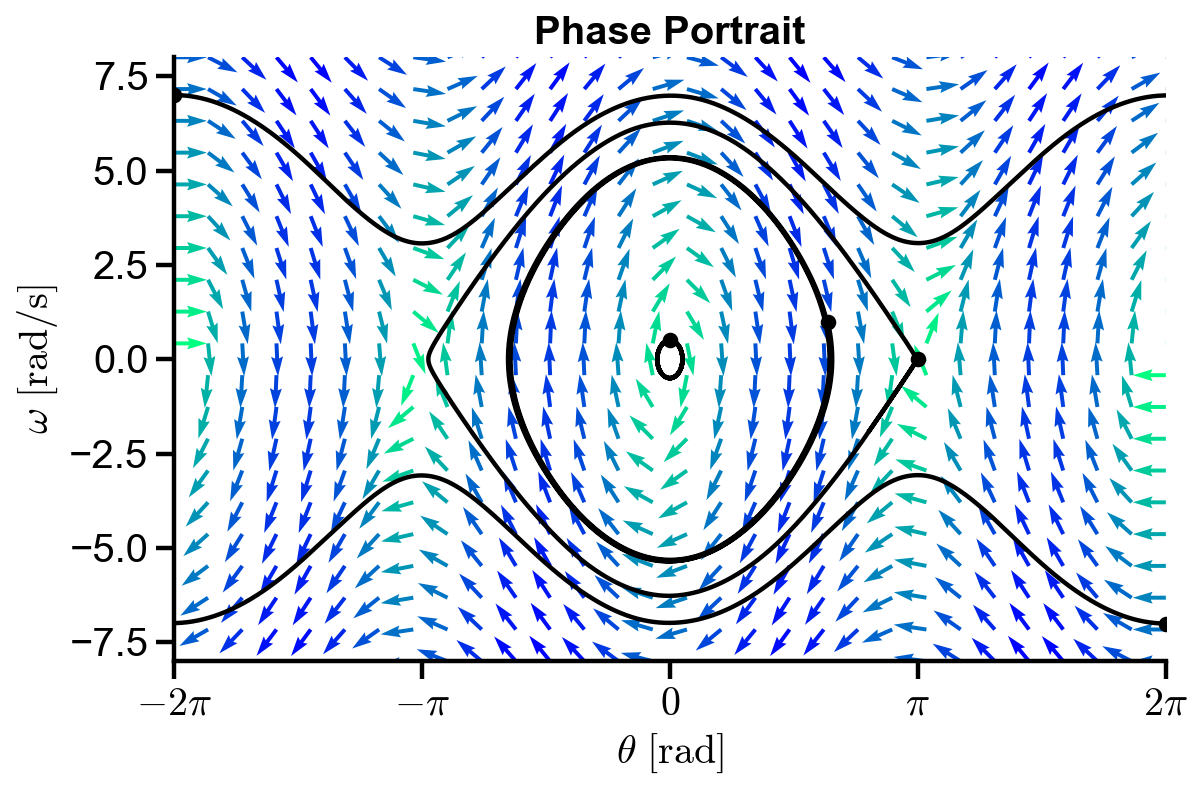

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))

for i in range(len(initial_vals)):
    # solve ode system
    ode_soln = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_vals[i], t_eval=t).y
    # plot trajectory
    ax.plot(*initial_vals[i], 'o', color='black', label='Initial')
    ax.plot(*ode_soln, color='black')

# slope field
scale = np.sqrt(dtheta_dt(Theta, Omega)**2 + domega_dt(Theta, Omega)**2)
ax.quiver(Theta, Omega, dtheta_dt(Theta, Omega)/scale, domega_dt(Theta, Omega)/scale, scale, cmap='winter_r', scale=30, width=0.004)  # regular
# plot settings
ax.set_xlabel('$\\theta \ [\mathrm{rad}]$')
ax.set_ylabel('$\omega \ [\mathrm{rad/s}]$')
ax.set_title('Phase Portrait')
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-8, 8)
plt.xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi], ['$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$']);

▲ The figure above shows the behavior of a nonlinear pendulum. 

The trajectories for small initial angle and velocity forms a closed loop, with both angle and velocity changing signs, indicating continued oscillatory behavior of the pendulum over time. The behavior of linear pendulum is also replicated as shown in the smallest loop at the center.

The trajectories for large initial angles and/or large initial velocity gives oscillating velocity about angles, but its sign is not changing, indicating that the pendulum is rotating in one direction.